In [5]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm
from typing import *
from dataclasses import dataclass
import json

plotly_margin = dict(l=0, r=0, t=0, b=0)  

In [6]:
def ld(i):
  return pd.read_json(f"exp/exp{i}.json")

In [7]:
e3 = ld(3)
e3

,avg_resid,std_resid,avg_wait,std_wait,dov_wait,dovpct_wait,prb_refuse,util,TB_param,GEN_param
0,9.520,8.727,2.553,5.350,0.000233,0.000091,0.174038,0.480,7,E
1,10.517,9.188,3.554,6.049,0.000304,0.000086,0.379612,0.360,7,T
2,8.888,8.389,1.921,4.770,0.000197,0.000103,0.079840,0.534,7,A
3,25.004,21.324,9.076,14.285,0.000750,0.000083,0.430611,0.756,16,E
4,25.568,21.386,9.703,14.576,0.000901,0.000093,0.589018,0.543,16,T
5,25.148,21.367,9.233,14.345,0.000715,0.000077,0.368546,0.838,16,A
6,83.730,64.325,37.138,45.106,0.003615,0.000097,0.755392,0.950,47,E
7,80.033,64.121,33.425,44.445,0.003919,0.000117,0.798014,0.785,47,T
8,85.756,64.594,39.175,45.487,0.003592,0.000092,0.748085,0.978,47,A
9,219.095,161.475,104.061,114.245,0.014092,0.000135,0.896761,0.990,117,E


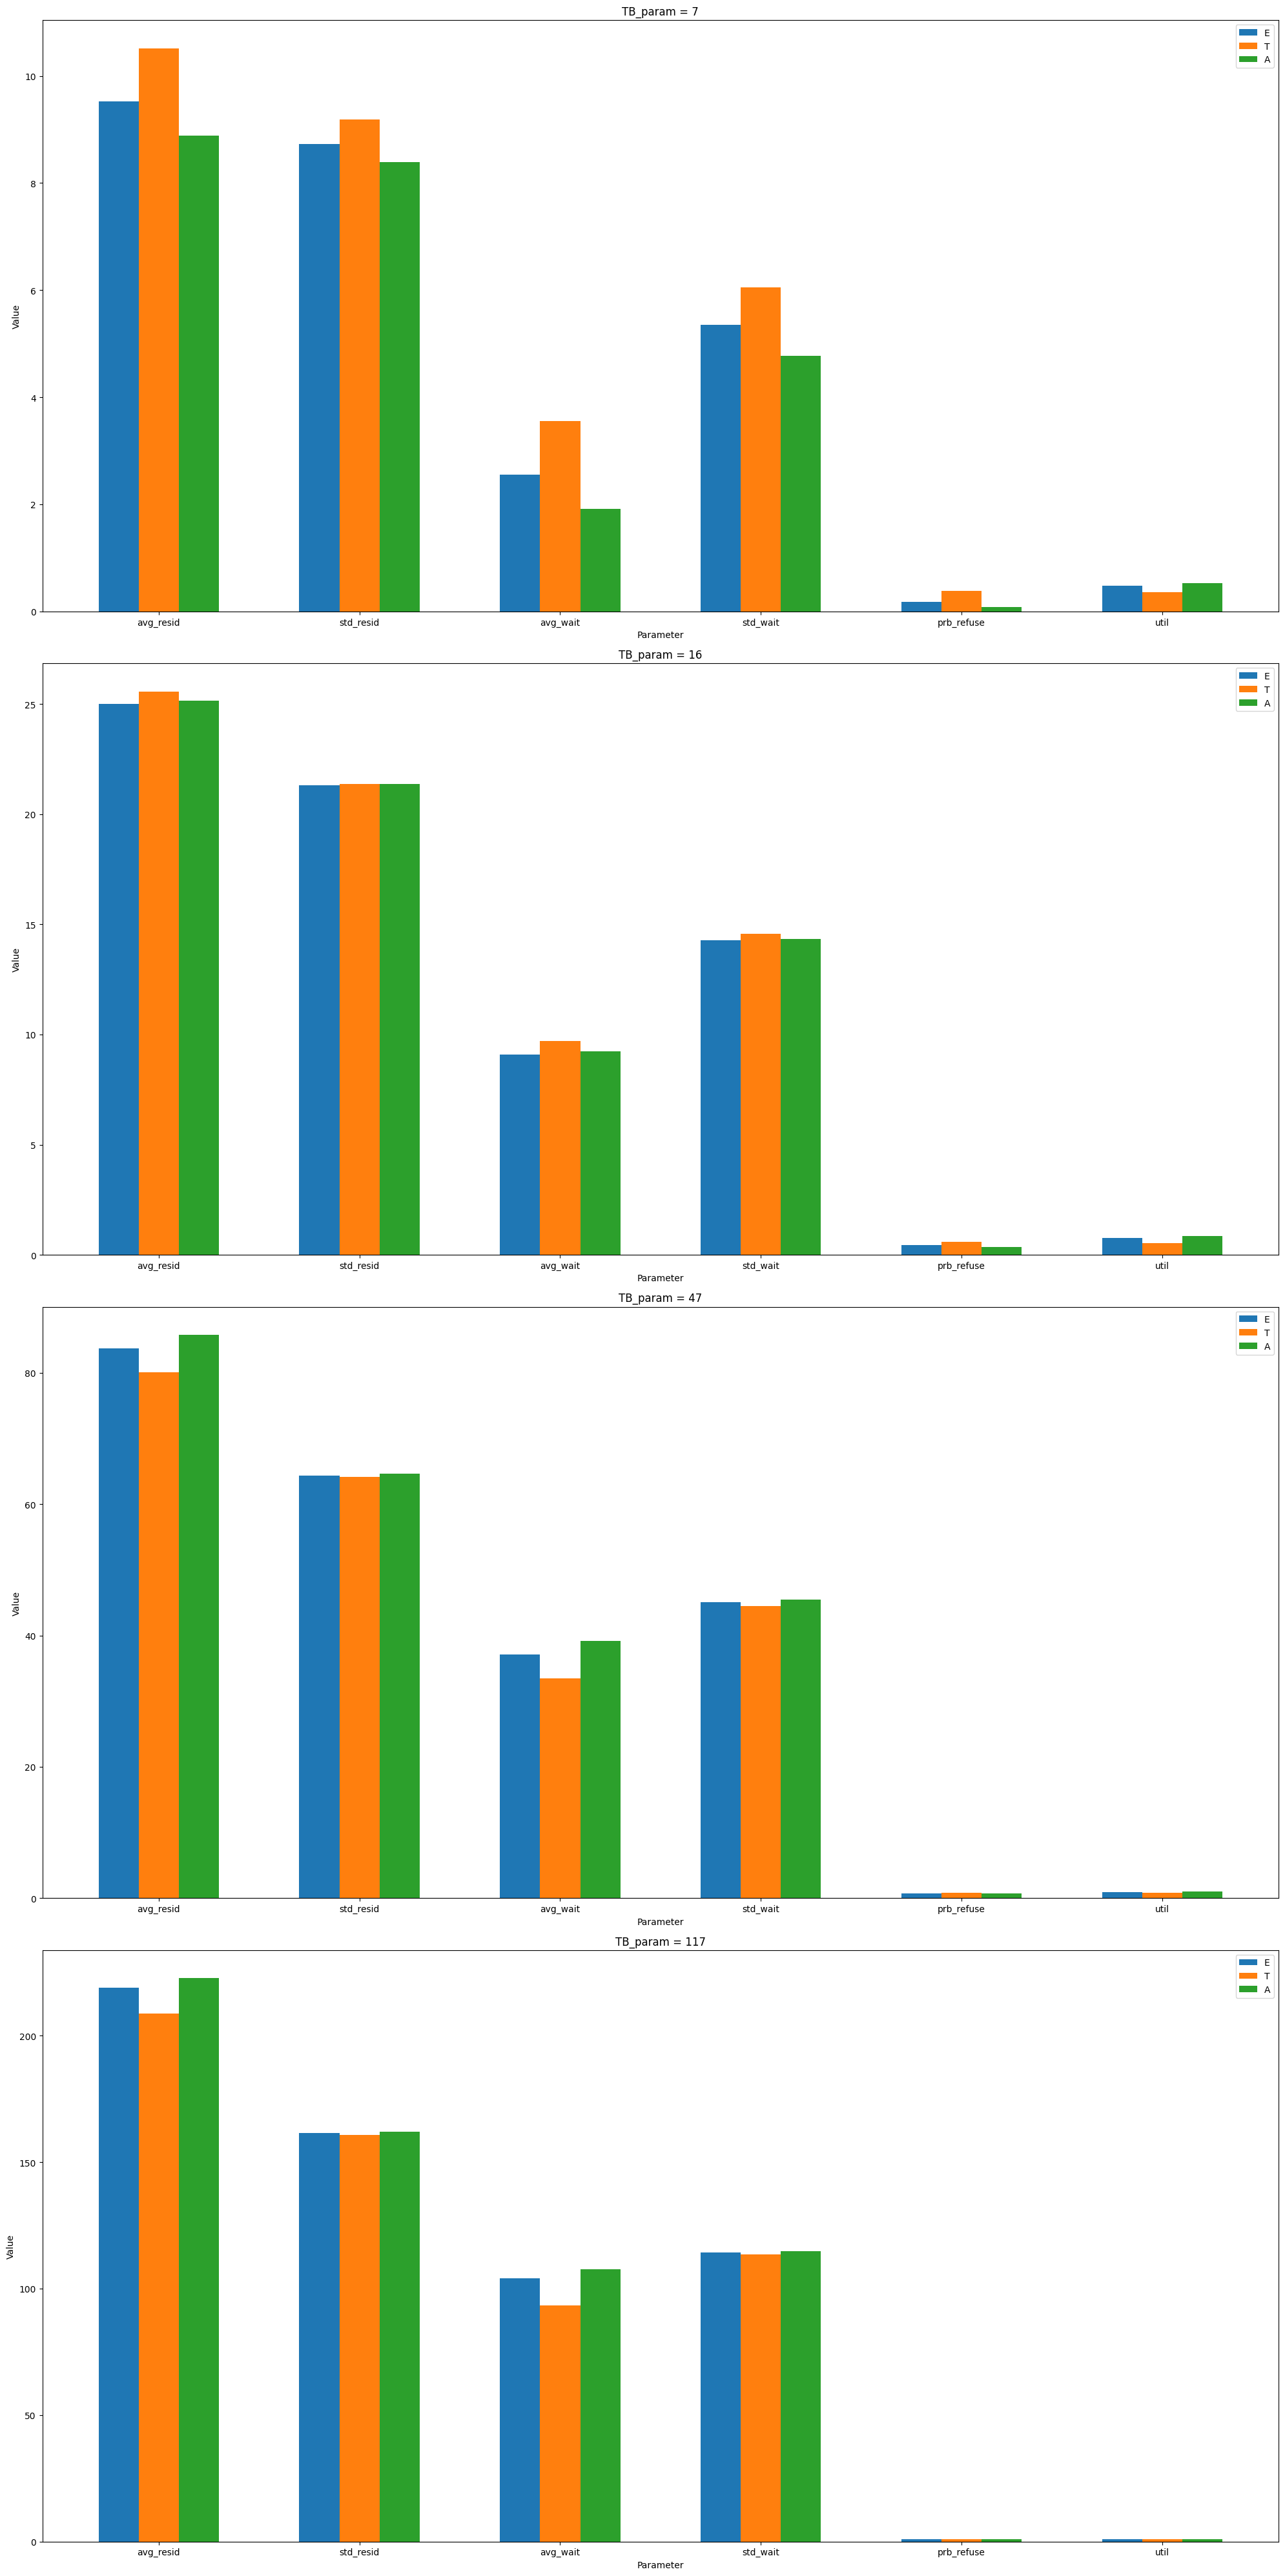

In [12]:
columns_to_plot = ['avg_resid', 'std_resid', 'avg_wait', 'std_wait', 'prb_refuse', 'util']

fig, axs = plt.subplots(len(e3['TB_param'].unique()), 1, figsize=(20, 10*len(e3['TB_param'].unique())))

for i, tb_param in enumerate(e3['TB_param'].unique()):
    df_tb = e3[e3['TB_param'] == tb_param]
    
    x = np.arange(len(columns_to_plot))
    width = 0.2
    
    for j, gen_param in enumerate(e3['GEN_param'].unique()):
        df_gen = df_tb[df_tb['GEN_param'] == gen_param]
        
        values = [df_gen[column].mean() for column in columns_to_plot]
        
        axs[i].bar(x + j*width, values, width, label=gen_param)
    
    axs[i].set_title(f'TB_param = {tb_param}')
    axs[i].set_xlabel('Parameter')
    axs[i].set_ylabel('Value')
    
    axs[i].set_xticks(x + width)
    axs[i].set_xticklabels(columns_to_plot)
    
    axs[i].legend()

fig.tight_layout()

plt.show()